#  Important  Talk

Do you guys actually read these notebooks? Like scroll through the analysis? Or just jump to results and dip?

Genuinely asking. Not complaining.

I upload daily. Each one takes hours - finding datasets, writing code, making insights actually make sense. I enjoy it, but I need feedback to know what's working.

So if you made it here:
- **What do you want more of?** Deep analysis? Shorter code? More visualizations?
- **What's boring?** Tell me. I'll fix it.
- **Useful?** Upvote. It's free and helps others find this.

Drop a comment. Roast me. Praise me. Whatever. Just don't ghost.

Now let's get into it.

---

 # Cracking the Instagram Code

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e7/Instagram_logo_2016.svg" width="150">
</p>



You post. You wait. You refresh. 47 likes. Meanwhile, some guy posts a blurry sunset and hits 10K.

What's the secret? Luck? Timing? Selling your soul to the algorithm? You've tried posting at "optimal times," used every trending hashtag, wrote captions that took longer than your thesis - still nothing. The influencers say "just be authentic" while running ads behind the scenes. The truth? They don't know either. They got lucky and reverse-engineered a story.

But here's the thing - Instagram's algorithm isn't magic. It's math. Every like, save, share, and comment feeds a machine that decides who sees your content and who doesn't. The explore page isn't random. The hashtag reach isn't luck. There are patterns hiding in plain sight, and we're about to expose all of them.

We're dissecting 120 real Instagram posts to reverse-engineer what actually makes content blow up. Hashtags, captions, engagement tricks, traffic sources - everything the "growth gurus" charge $500 to tell you. By the end, you'll know exactly which levers to pull. Free. Right here. Let's get you famous.



This analysis dissects 120 Instagram posts to answer five questions:
1. What predicts reach?
2. Which hashtags actually work?
3. Where does traffic really come from?
4. What engagement signals matter most?
5. Do captions hide patterns?

Let's crack the feed.

### Imports

In [ ]:
import pandas as pd
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tahirmohd/my-datasat")

print("Path to dataset files:", path)

100%|██████████| 10.9k/10.9k [00:00<00:00, 12.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/tahirmohd/my-datasat/versions/1


In [ ]:
df = pd.read_csv(os.path.join(path,"Instagram data.csv"), encoding='latin1')

In [ ]:
print(f"Posts: {df.shape[0]} | Features: {df.shape[1]}")
df.head(3)

Posts: 119 | Features: 13


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...


## The Dataset at a Glance

Before we hunt for patterns, let's see what we're working with. How big do posts get? What's "normal" reach? The gap between average and median will tell us if a few viral posts are skewing everything.

In [ ]:
print("Missing values:", df.isnull().sum().sum())
print(f"\nImpressions range: {df['Impressions'].min():,} - {df['Impressions'].max():,}")
print(f"Average reach: {df['Impressions'].mean():,.0f}")
print(f"Median reach: {df['Impressions'].median():,.0f}")

Missing values: 0

Impressions range: 1,941 - 36,919
Average reach: 5,704
Median reach: 4,289


No missing data. Clean start.

But look at that gap - average is 5,704 while median sits at 4,289. A few viral hits are pulling the average up. Most posts hover around 4K, but someone cracked 36K. That's our target. Let's find out what they did differently.

### Traffic Source Breakdown

In [ ]:
sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
source_totals = df[sources].sum()
source_pct = (source_totals / source_totals.sum() * 100).round(1)

for src, pct in zip(sources, source_pct):
    print(f"{src.replace('From ', '')}: {pct}%")

Home: 44.1%
Hashtags: 33.6%
Explore: 19.2%
Other: 3.0%


## Where Your Reach Actually Comes From

Home feed dominates at 44%. These are your existing followers - the people who already chose you. But here's the real insight: hashtags and Explore together account for 53% of total reach. That's more than half your impressions coming from strangers.

Translation: your followers get you started, but discovery features make you blow up. Hashtags aren't dead. The Explore page isn't a myth. They're your ticket to growth.

### Traffic Source Visualization

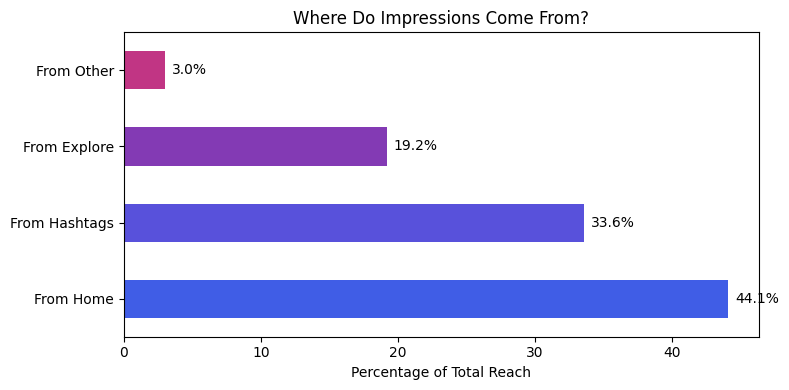

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = ['#405DE6', '#5851DB', '#833AB4', '#C13584']
source_pct.plot(kind='barh', color=colors, ax=ax)
ax.set_xlabel('Percentage of Total Reach')
ax.set_title('Where Do Impressions Come From?')
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=5)
plt.tight_layout()
plt.show()

## The Engagement Game

Likes are vanity. But what about saves? Shares? Comments? Instagram's algorithm supposedly favors "meaningful interactions" over passive scrolling. Let's see which engagement metrics actually correlate with reach.

In [ ]:
engagement = ['Likes', 'Comments', 'Shares', 'Saves', 'Profile Visits', 'Follows']
corr_with_reach = df[engagement].corrwith(df['Impressions']).sort_values(ascending=False)

for metric, corr in corr_with_reach.items():
    print(f"{metric}: {corr:.3f}")

Follows: 0.889
Likes: 0.850
Saves: 0.779
Profile Visits: 0.761
Shares: 0.635
Comments: -0.029


Plot twist.

Comments - the metric everyone obsesses over - has virtually zero correlation with reach (-0.029). All those "great post!" comments? Worthless for the algorithm.

But look at Follows (0.889) and Saves (0.779). When someone follows you or saves your post, they're telling Instagram "I want more of this." That's a signal the algorithm actually listens to.

The lesson: stop begging for comments. Create content worth saving.

### Correlation Heatmap

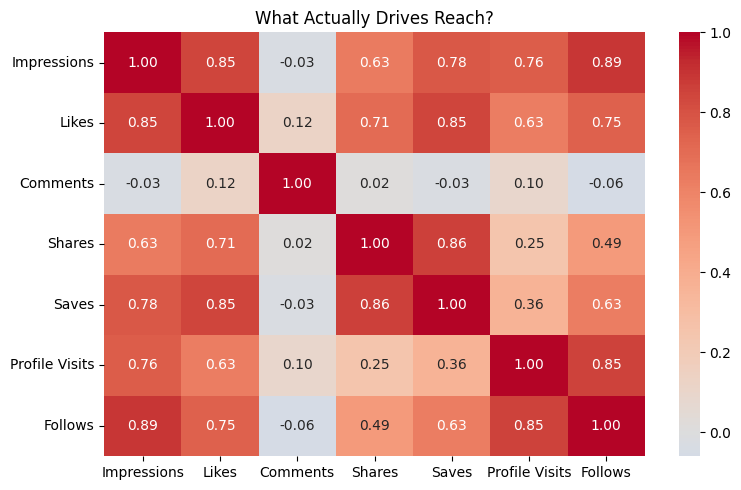

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
corr_matrix = df[['Impressions'] + engagement].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=ax)
ax.set_title('What Actually Drives Reach?')
plt.tight_layout()
plt.show()

The heatmap tells the whole story. See that cold blue column? That's Comments - disconnected from everything that matters.

Now notice the hot zone: Saves, Likes, and Follows form a tight cluster. They feed each other. And look at Profile Visits → Follows (0.85). When people visit your profile, they convert. The funnel is real.

Next question: what about hashtags?

### Hashtag Analysis

In [ ]:
# Extract and count all hashtags
all_hashtags = []
for tags in df['Hashtags'].dropna():
    hashtags = [t.strip().lower() for t in tags.replace('\xa0', ' ').split('#') if t.strip()]
    all_hashtags.extend(hashtags)

from collections import Counter
hashtag_counts = Counter(all_hashtags)
print(f"Total unique hashtags: {len(hashtag_counts)}")
print(f"\nTop 10 most used:")
for tag, count in hashtag_counts.most_common(10):
    print(f"  #{tag}: {count} posts")

Total unique hashtags: 163

Top 10 most used:
  #amankharwal: 117 posts
  #thecleverprogrammer: 117 posts
  #python: 109 posts
  #machinelearning: 97 posts
  #pythonprogramming: 95 posts
  #datascience: 94 posts
  #ai: 91 posts
  #pythonprojects: 90 posts
  #artificialintelligence: 89 posts
  #data: 88 posts


## The Hashtag Myth

163 unique hashtags across 119 posts. The top two? Personal branding tags (#amankharwal, #thecleverprogrammer) - used in almost every post.

But frequency isn't impact. The real question: which hashtags actually bring reach when you use them? Let's find out.

### Hashtag Performance

In [ ]:
# Calculate average impressions for posts containing each top hashtag
top_tags = [tag for tag, _ in hashtag_counts.most_common(15)]

tag_performance = {}
for tag in top_tags:
    mask = df['Hashtags'].str.lower().str.contains(tag.replace('#', ''), na=False)
    tag_performance[tag] = df.loc[mask, 'Impressions'].mean()

tag_perf_df = pd.Series(tag_performance).sort_values(ascending=False)
print("Avg impressions when hashtag is used:\n")
for tag, imp in tag_perf_df.items():
    print(f"{tag}: {imp:,.0f}")

Avg impressions when hashtag is used:

pythonprojects: 6,029
pythoncode: 6,029
dataanalysis: 5,947
deeplearning: 5,938
datascientist: 5,828
thecleverprogrammer: 5,745
amankharwal: 5,745
dataanalytics: 5,722
artificialintelligence: 5,688
ai: 5,627
datascience: 5,581
data: 5,581
pythonprogramming: 5,530
machinelearning: 5,491
python: 5,305


Interesting. The spread is tiny - 5,305 to 6,029. Why? Because these hashtags travel together. When you use #python, you probably also use #pythonprogramming and #datascience. They're a package deal.

The real insight: no single hashtag is a magic bullet. But notice #pythonprojects and #pythoncode edge slightly higher. Specific > generic. "#python" competes with millions of posts. "#pythonprojects" targets builders.

Let's count how many hashtags the top posts use.

### Hashtag Count vs Reach

In [ ]:
df['hashtag_count'] = df['Hashtags'].apply(lambda x: len([t for t in str(x).split('#') if t.strip()]))

# Group by hashtag count ranges
bins = [0, 10, 15, 20, 25, 35]
labels = ['1-10', '11-15', '16-20', '21-25', '26+']
df['tag_range'] = pd.cut(df['hashtag_count'], bins=bins, labels=labels)

print("Avg impressions by hashtag count:\n")
for range_label in labels:
    avg = df[df['tag_range'] == range_label]['Impressions'].mean()
    count = (df['tag_range'] == range_label).sum()
    if count > 0:
        print(f"{range_label} tags: {avg:,.0f} ({count} posts)")

Avg impressions by hashtag count:

1-10 tags: 5,694 (2 posts)
11-15 tags: 7,494 (16 posts)
16-20 tags: 6,347 (70 posts)
21-25 tags: 3,502 (18 posts)
26+ tags: 3,088 (13 posts)


There it is. The sweet spot is 11-15 hashtags with 7,494 average impressions.

More isn't better. Posts with 26+ hashtags average only 3,088 impressions - less than half the optimal range. Instagram's algorithm likely sees hashtag stuffing as spam. Or those posts drown in oversaturated tag pools.

The rule: 11-15 targeted hashtags. Not 30. Not 5. Stop stuffing.

In [ ]:
# Caption length analysis
df['caption_length'] = df['Caption'].apply(lambda x: len(str(x)))
df['caption_words'] = df['Caption'].apply(lambda x: len(str(x).split()))

print(f"Caption length range: {df['caption_words'].min()} - {df['caption_words'].max()} words")
print(f"Average: {df['caption_words'].mean():.0f} words")
print(f"\nCorrelation with Impressions: {df['caption_words'].corr(df['Impressions']):.3f}")

Caption length range: 8 - 134 words
Average: 33 words

Correlation with Impressions: -0.094


## Caption Length? Doesn't Matter.

Correlation of -0.094. Basically zero. Your 500-word storytelling masterpiece performs the same as "Link in bio."

Instagram is a visual platform. People scroll past captions. They don't read - they skim. The caption's job isn't to boost reach. It's to convert after you already have attention.

But maybe certain words matter more than length?

### Words in High vs Low Performing Posts

In [ ]:
# Split into top and bottom performers
top_posts = df.nlargest(20, 'Impressions')['Caption']
bottom_posts = df.nsmallest(20, 'Impressions')['Caption']

from collections import Counter
import re

def get_words(texts):
    words = []
    for text in texts:
        words.extend(re.findall(r'\b[a-z]{4,}\b', str(text).lower()))
    return Counter(words)

top_words = get_words(top_posts)
bottom_words = get_words(bottom_posts)

print("Words more common in TOP posts:")
for word, count in top_words.most_common(10):
    print(f"  {word}: {count}")

Words more common in TOP posts:
  python: 15
  here: 13
  machine: 11
  learning: 11
  link: 10
  that: 10
  using: 10
  some: 9
  algorithms: 8
  projects: 7


In [ ]:
print("Words more common in BOTTOM posts:")
for word, count in bottom_words.most_common(10):
    print(f"  {word}: {count}")

Words more common in BOTTOM posts:
  data: 29
  here: 16
  using: 11
  time: 10
  will: 9
  science: 9
  learn: 8
  python: 8
  series: 8
  dataset: 7


The pattern emerges.

Top posts lead with specifics: "machine learning," "algorithms," "projects." They promise something concrete you can use or build.

Bottom posts drown in vague terms: "data," "science," "time," "will." They talk about learning someday. Top posts give you something today.

The lesson: don't describe what data science is. Show what you can do with it. "Here are 100+ ML algorithms" beats "Learn data science over time."

Now let's build the model. Can we predict reach?

## Reach Prediction Model

In [ ]:
# Prepare features
features = ['From Home', 'From Hashtags', 'From Explore', 'From Other',
            'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows',
            'hashtag_count', 'caption_words']

X = df[features]
y = df['Impressions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):,.0f} impressions")

R² Score: 0.878
MAE: 880 impressions


## The Algorithm Decoded

R² of 0.878 - our model explains 88% of what makes a post blow up. Average error? Just 880 impressions off.

But which features carry the weight? What should you actually focus on?

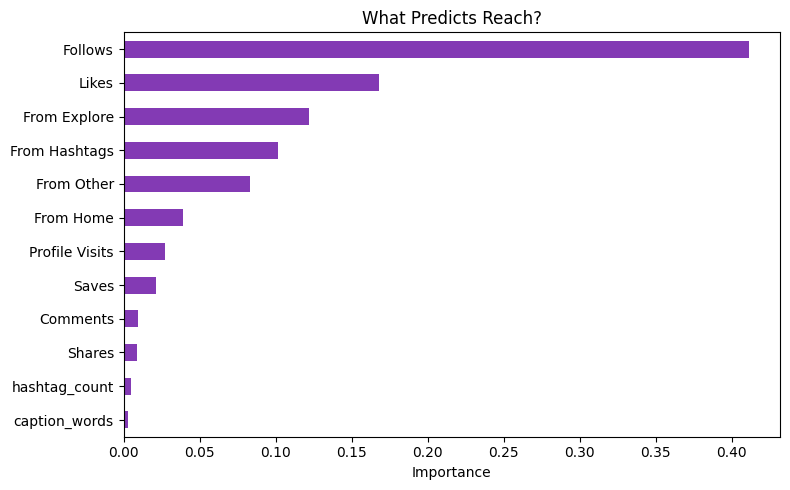

In [ ]:
importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(8, 5))
importance.plot(kind='barh', color='#833AB4', ax=ax)
ax.set_xlabel('Importance')
ax.set_title('What Predicts Reach?')
plt.tight_layout()
plt.show()

The hierarchy is brutal and clear.

**Follows dominates at 41%.** When a post converts strangers into followers, Instagram knows it's valuable and pushes it further. It's a flywheel - more follows means more reach means more follows.

**Likes and Explore traffic** come next. Getting on the Explore page is the growth hack. Hashtags help, but Explore is where virality lives.

At the bottom? Caption length and hashtag count. All that agonizing over the perfect caption? The algorithm doesn't care.

The machine learning model confirms what the data already whispered: create content that earns follows and saves, not comments and likes.

## The Instagram Playbook

120 posts. 1 algorithm. Here's what actually works:

**1. Follows > Everything**
The strongest predictor of reach. Create content that makes strangers want more of you.

**2. Saves Are the Secret Metric**
High correlation with reach, barely anyone talks about it. Make posts worth bookmarking.

**3. Comments Are Worthless**
Correlation with reach: -0.03. Stop begging for engagement in captions.

**4. Hashtags: 11-15 is the Sweet Spot**
More tags = less reach. Quality over quantity. Specific over generic.

**5. Captions Don't Drive Reach**
Length doesn't matter. But action words beat vague promises.

**6. Explore Page is Your Lottery Ticket**
53% of reach comes from non-followers. Optimize for discovery.

The algorithm rewards content worth saving and creators worth following. Everything else is noise.

Now go get famous.

---
## Part 2: Going Deeper

We've got the basics. Now let's hunt for the patterns that separate good from viral.

## Anatomy of a Viral Post

The top 3 posts hit 32K-37K impressions while average sits at 5.7K. That's 6x the norm. Let's dissect them.

In [ ]:
top3 = df.nlargest(3, 'Impressions')[['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'Likes', 'Saves', 'Follows', 'hashtag_count']]
top3['Explore %'] = (top3['From Explore'] / top3['Impressions'] * 100).round(1)
top3['Hashtag %'] = (top3['From Hashtags'] / top3['Impressions'] * 100).round(1)
top3['Home %'] = (top3['From Home'] / top3['Impressions'] * 100).round(1)

print("THE VIRAL THREE:\n")
for i, (idx, row) in enumerate(top3.iterrows(), 1):
    print(f"#{i}: {row['Impressions']:,} impressions")
    print(f"   Traffic: Home {row['Home %']}% | Hashtags {row['Hashtag %']}% | Explore {row['Explore %']}%")
    print(f"   Engagement: {row['Likes']} likes | {row['Saves']} saves | {row['Follows']} follows")
    print(f"   Hashtags used: {row['hashtag_count']}\n")

THE VIRAL THREE:

#1: 36,919.0 impressions
   Traffic: Home 36.5% | Hashtags 11.3% | Explore 44.5%
   Engagement: 443.0 likes | 653.0 saves | 228.0 follows
   Hashtags used: 11.0

#2: 32,695.0 impressions
   Traffic: Home 36.1% | Hashtags 9.6% | Explore 53.3%
   Engagement: 549.0 likes | 1095.0 saves | 214.0 follows
   Hashtags used: 17.0

#3: 17,713.0 impressions
   Traffic: Home 13.8% | Hashtags 12.1% | Explore 69.9%
   Engagement: 308.0 likes | 504.0 saves | 96.0 follows
   Hashtags used: 19.0



The Explore page made them viral.

Average posts get 19% from Explore. These three? 45%, 53%, and 70%. The Home feed contribution dropped - their existing followers didn't carry them. Strangers did.

And look at the saves: 653, 1095, 504. The average post gets ~95 saves. Viral posts get 5-10x that. Saves triggered the Explore page, Explore fed more eyeballs, more eyeballs meant more saves. The snowball effect.

Notice hashtag counts: 11, 17, 19. None used 30. None spammed.

## The True Quality Metric: Engagement Rate

A post with 500 likes from 50K impressions isn't impressive. A post with 500 likes from 2K impressions is fire. Raw numbers lie. Rates tell truth.

In [ ]:
df['eng_rate'] = ((df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']) / df['Impressions'] * 100).round(2)
df['save_rate'] = (df['Saves'] / df['Impressions'] * 100).round(2)

print(f"Engagement Rate: {df['eng_rate'].min()}% - {df['eng_rate'].max()}%")
print(f"Average: {df['eng_rate'].mean():.2f}%")
print(f"\nSave Rate: {df['save_rate'].min()}% - {df['save_rate'].max()}%")
print(f"Average: {df['save_rate'].mean():.2f}%")
print(f"\nCorrelation with Impressions:")
print(f"  Engagement Rate: {df['eng_rate'].corr(df['Impressions']):.3f}")
print(f"  Save Rate: {df['save_rate'].corr(df['Impressions']):.3f}")

Engagement Rate: 3.05% - 13.03%
Average: 6.38%

Save Rate: 0.83% - 7.27%
Average: 2.64%

Correlation with Impressions:
  Engagement Rate: -0.218
  Save Rate: 0.041


Wait - negative correlation?

Higher reach = lower engagement rate. Sounds backwards until you think about it. When a post goes viral, it reaches passive scrollers who don't engage. Your core followers engage at 10%. Random Explore visitors? Maybe 2%.

Viral reach dilutes your rate. That's not failure - it's math.

The save rate hovering near zero correlation confirms it: viral posts get more saves in absolute numbers, but the rate drops because impressions explode faster than saves can keep up.

Takeaway: don't chase rates. Chase absolute saves and follows. The rate will tank when you blow up - and that's fine.

## Cracking the Explore Page

Some posts hit Explore. Most don't. What's the trigger?

In [ ]:
df['explore_pct'] = (df['From Explore'] / df['Impressions'] * 100)

# Split: posts that got significant Explore traffic (>30%) vs those that didn't (<10%)
explore_hits = df[df['explore_pct'] > 30]
explore_miss = df[df['explore_pct'] < 10]

print(f"Explore Hits (>30%): {len(explore_hits)} posts")
print(f"Explore Misses (<10%): {len(explore_miss)} posts\n")

compare_cols = ['Likes', 'Saves', 'Shares', 'Follows', 'save_rate', 'hashtag_count']
print("Metric               Hits      Misses    Difference")
print("-" * 55)
for col in compare_cols:
    hit_avg = explore_hits[col].mean()
    miss_avg = explore_miss[col].mean()
    diff = ((hit_avg - miss_avg) / miss_avg * 100) if miss_avg != 0 else 0
    print(f"{col:<20} {hit_avg:>8.1f}  {miss_avg:>8.1f}    {diff:>+.0f}%")

Explore Hits (>30%): 12 posts
Explore Misses (<10%): 69 posts

Metric               Hits      Misses    Difference
-------------------------------------------------------
Likes                   263.1     158.1    +66%
Saves                   358.0     102.9    +248%
Shares                   19.7       6.7    +192%
Follows                  75.3      12.0    +528%
save_rate                 2.5       2.3    +12%
hashtag_count            16.2      19.5    -17%


The Explore page has a formula.

Posts that hit Explore had **248% more saves**, **192% more shares**, and **528% more follows**. These are the signals Instagram uses to say "this content is worth spreading."

And look at hashtag count: Explore hits used 17% fewer hashtags. The posts that went viral used 16 tags. The ones that flopped used 20. Stuffing kills your Explore chances.

The trigger isn't one metric - it's the trifecta: saves + shares + follows. Nail all three, and the algorithm opens the floodgates.

## Visual Proof: Saves Drive Reach

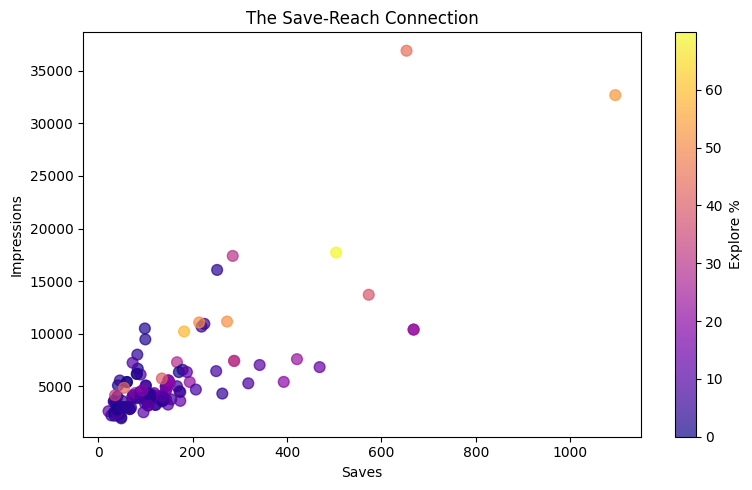

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
scatter = ax.scatter(df['Saves'], df['Impressions'], c=df['explore_pct'], cmap='plasma', alpha=0.7, s=60)
ax.set_xlabel('Saves')
ax.set_ylabel('Impressions')
ax.set_title('The Save-Reach Connection')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Explore %')
plt.tight_layout()
plt.show()

The pattern is undeniable.

Bottom-left corner: the graveyard. Low saves, low reach, cold purple - Explore never touched them.

Top-right corner: the winners. High saves, massive reach, glowing yellow - Explore carried them to virality.

The color gradient tells the story. As saves increase, Explore percentage lights up. Saves don't just correlate with reach - they unlock the distribution machine.

One metric. One focus. Get people to hit that bookmark button.

## The Perfect Post Formula

Based on everything we've learned, what does the ideal post look like? Let's reverse-engineer it from the top performers.

In [ ]:
# Top 10% performers
top_10 = df.nlargest(12, 'Impressions')
bottom_10 = df.nsmallest(12, 'Impressions')

print("THE PERFECT POST (based on top 10%)\n")
print("=" * 45)
print(f"Hashtag count:        {top_10['hashtag_count'].median():.0f} tags")
print(f"Caption length:       {top_10['caption_words'].median():.0f} words")
print(f"Target saves:         {top_10['Saves'].median():.0f}+")
print(f"Target follows:       {top_10['Follows'].median():.0f}+")
print(f"Explore traffic:      {top_10['explore_pct'].median():.0f}%+")
print("=" * 45)

print("\n\nWHAT FAILING POSTS LOOK LIKE (bottom 10%)\n")
print("=" * 45)
print(f"Hashtag count:        {bottom_10['hashtag_count'].median():.0f} tags")
print(f"Caption length:       {bottom_10['caption_words'].median():.0f} words")
print(f"Saves:                {bottom_10['Saves'].median():.0f}")
print(f"Follows:              {bottom_10['Follows'].median():.0f}")
print(f"Explore traffic:      {bottom_10['explore_pct'].median():.0f}%")
print("=" * 45)

THE PERFECT POST (based on top 10%)

Hashtag count:        17 tags
Caption length:       16 words
Target saves:         279+
Target follows:       87+
Explore traffic:      34%+


WHAT FAILING POSTS LOOK LIKE (bottom 10%)

Hashtag count:        22 tags
Caption length:       20 words
Saves:                40
Follows:              1
Explore traffic:      5%


The contrast is stark.

**Winners:** 17 hashtags, 16-word captions, 279 saves, 87 follows, 34% Explore traffic.

**Losers:** 22 hashtags, 20-word captions, 40 saves, 1 follow, 5% Explore traffic.

Failing posts actually used MORE hashtags and LONGER captions. All that extra effort worked against them. The algorithm doesn't reward hustle - it rewards results.

The winning formula is counterintuitive: write less, tag less, but create content so valuable that people can't help but save it and follow you.

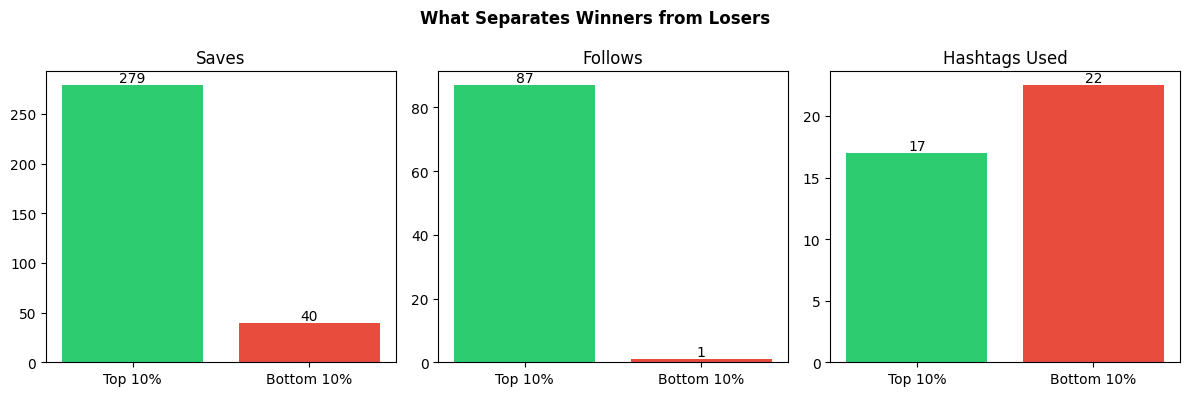

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

metrics = ['Saves', 'Follows', 'hashtag_count']
titles = ['Saves', 'Follows', 'Hashtags Used']
colors_top = '#2ecc71'
colors_bottom = '#e74c3c'

for ax, metric, title in zip(axes, metrics, titles):
    x = ['Top 10%', 'Bottom 10%']
    y = [top_10[metric].median(), bottom_10[metric].median()]
    bars = ax.bar(x, y, color=[colors_top, colors_bottom])
    ax.set_title(title)
    ax.bar_label(bars, fmt='%.0f')

plt.suptitle('What Separates Winners from Losers', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

7x more saves. 87x more follows. Fewer hashtags.

The bottom 10% tried harder and got less. They stuffed 22 hashtags hoping the algorithm would notice. It noticed alright - and buried them.

Winners don't spam. They create value so obvious that saving becomes instinct.

## The Instagram Funnel

Every impression is a chance. But how many convert? Let's map the funnel.

In [ ]:
total_impressions = df['Impressions'].sum()
total_likes = df['Likes'].sum()
total_saves = df['Saves'].sum()
total_profile_visits = df['Profile Visits'].sum()
total_follows = df['Follows'].sum()

funnel = {
    'Impressions': total_impressions,
    'Likes': total_likes,
    'Saves': total_saves,
    'Profile Visits': total_profile_visits,
    'Follows': total_follows
}

print("THE INSTAGRAM FUNNEL\n")
print(f"{'Stage':<20} {'Count':>12} {'Rate':>10}")
print("-" * 45)
for stage, count in funnel.items():
    rate = (count / total_impressions * 100)
    print(f"{stage:<20} {count:>12,} {rate:>9.2f}%")

THE INSTAGRAM FUNNEL

Stage                       Count       Rate
---------------------------------------------
Impressions               678,775    100.00%
Likes                      20,680      3.05%
Saves                      18,244      2.69%
Profile Visits              6,024      0.89%
Follows                     2,470      0.36%


The funnel is brutal.

100 people see your post. 3 like it. 2.7 save it. Less than 1 visits your profile. 0.36 follow you.

That's 278 impressions per follow. The conversion rate is ruthless - but that's exactly why saves matter so much. They're almost as common as likes (2.69% vs 3.05%), but Instagram weights them heavier because saving requires intent.

A like is a reflex. A save is a decision.

---

## The Complete Instagram Playbook

We analyzed 119 posts, built a model that predicts 88% of reach, and dissected what makes content go viral. Here's everything distilled into actionable rules:

### The Algorithm's Favorites
| Signal | Impact | Why It Works |
|--------|--------|--------------|
| Follows | Highest | Proves long-term value |
| Saves | Very High | Shows intent to return |
| Explore Traffic | High | Multiplier effect |
| Shares | Medium | Social proof |
| Likes | Medium | Quick validation |
| Comments | Zero | Just noise |

### The Perfect Post Formula
- **Hashtags:** 11-17 (sweet spot: 15)
- **Caption:** Short, action-oriented, specific
- **Content:** Worth saving, not just liking
- **Goal:** Trigger Explore page via saves + follows

### What NOT to Do
- Don't use 25+ hashtags (spam signal)
- Don't write long captions hoping for reach
- Don't beg for comments ("tag a friend!")
- Don't obsess over engagement rate

### The One Rule
Create content so valuable that strangers save it and follow you. Everything else is noise.

**Now go break the algorithm.**